In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
with open("utility_record.txt") as textFile:
    elessar = [line.split(", ") for line in textFile]
    
with open("utility_record_primary.txt") as textFile:
    primary = [line.split(", ") for line in textFile]
    
with open("utility_record_conservative.txt") as textFile:
    conservative = [line.split(", ") for line in textFile]

In [70]:
elessar_np = np.array(elessar)
primary_np = np.array(primary)
conservative_np = np.array(conservative)

In [71]:
elessar_np = elessar_np.reshape(1000,-1)
primary_np = primary_np.reshape(1000,-1)
conservative_np = conservative_np.reshape(1000,-1)

In [72]:
for i in range(1000):
    elessar_np[i][0] = elessar_np[i][0][1:]
    elessar_np[i][-1] = elessar_np[i][-1][:-1]
    primary_np[i][0] = primary_np[i][0][1:]
    primary_np[i][-1] = primary_np[i][-1][:-1]
    conservative_np[i][0] = conservative_np[i][0][1:]
    conservative_np[i][-1] = conservative_np[i][-1][:-1]

In [73]:
elessar_np[0][0] = elessar_np[0][0][1:]
elessar_np[-1][-1] = elessar_np[-1][-1][:-2]
primary_np[0][0] = primary_np[0][0][1:]
primary_np[-1][-1] = primary_np[-1][-1][:-2]
conservative_np[0][0] = conservative_np[0][0][1:]
conservative_np[-1][-1] = conservative_np[-1][-1][:-2]

In [74]:
elessar_float = elessar_np.astype(np.float)
primary_float = primary_np.astype(np.float)
conservative_float = conservative_np.astype(np.float)

In [75]:
elessar_mean = np.mean(elessar_float, axis=0)
primary_mean = np.mean(primary_float, axis=0)
conservative_mean = np.mean(conservative_float, axis=0)

In [76]:
xx = np.arange(100)
xx[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

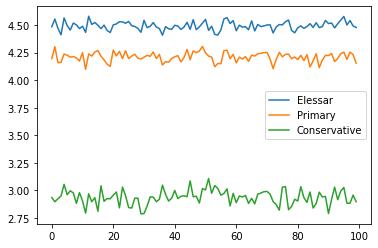

In [92]:
plt.plot(xx, elessar_mean[:100], label="Elessar")
plt.plot(xx, primary_mean[:100], label="Primary")
plt.plot(xx, conservative_mean[:100], label="Conservative")
plt.legend()

In [78]:
elessar_worst = np.min(elessar_float, axis=0)
primary_worst = np.min(primary_float, axis=0)
conservative_worst = np.min(conservative_float, axis=0)

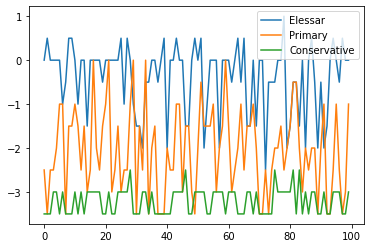

In [85]:
xx = np.arange(100)
plt.plot(xx, elessar_worst[:100], label="Elessar")
plt.plot(xx, primary_worst[:100], label="Primary")
plt.plot(xx, conservative_worst[:100], label="Conservative")
plt.legend()

In [80]:
elessar_worst = np.min(elessar_float, axis=0)
primary_worst = np.min(primary_float, axis=0)
conservative_worst = np.min(conservative_float, axis=0)

In [81]:
elessar_worst.shape

(2000,)

In [82]:
elessar_best = np.max(elessar_float, axis=0)
primary_best = np.max(primary_float, axis=0)
conservative_best = np.max(conservative_float, axis=0)

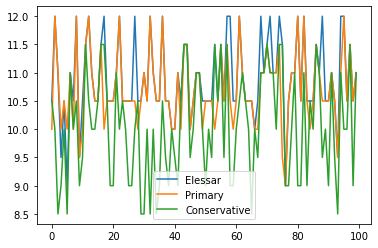

In [86]:
plt.plot(xx, elessar_best[:100], label="Elessar")
plt.plot(xx, primary_best[:100], label="Primary")
plt.plot(xx, conservative_best[:100], label="Conservative")
plt.legend()

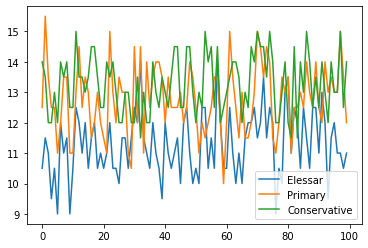

In [87]:
plt.plot(xx, elessar_best[:100] - elessar_worst[:100], label="Elessar")
plt.plot(xx, primary_best[:100] - primary_worst[:100], label="Primary")
plt.plot(xx, conservative_best[:100] - conservative_worst[:100], label="Conservative")
plt.legend()

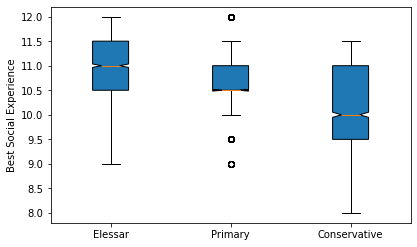

In [89]:
fig = plt.figure(figsize =(5, 3))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
#data = [elessar_float_cum_diff, primary_float_cum_diff, conservative_float_cum_diff]
data = [elessar_best, primary_best, conservative_best]
# Creating plot
bp = ax.boxplot(data, notch=True, patch_artist=True)
ax.set_xticklabels(['Elessar', 'Primary','Conservative'])
ax.set_ylabel("Best Social Experience")
# show plot
plt.show()

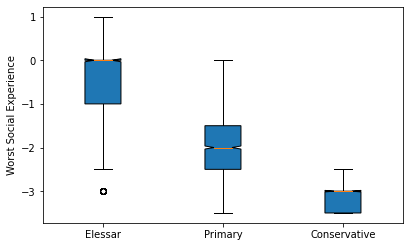

In [90]:
fig = plt.figure(figsize =(5, 3))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
#data = [elessar_float_cum_diff, primary_float_cum_diff, conservative_float_cum_diff]
data = [elessar_worst, primary_worst, conservative_worst]
# Creating plot
bp = ax.boxplot(data, notch=True, patch_artist=True)
ax.set_xticklabels(['Elessar', 'Primary','Conservative'])
ax.set_ylabel("Worst Social Experience")
# show plot
plt.show()

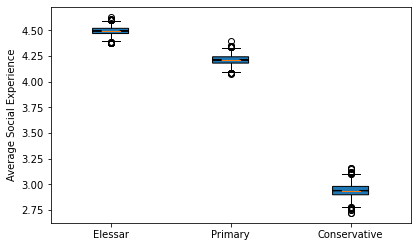

In [91]:
fig = plt.figure(figsize =(5, 3))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
#data = [elessar_float_cum_diff, primary_float_cum_diff, conservative_float_cum_diff]
data = [elessar_mean, primary_mean, conservative_mean]
# Creating plot
bp = ax.boxplot(data, notch=True, patch_artist=True)
ax.set_xticklabels(['Elessar', 'Primary','Conservative'])
ax.set_ylabel("Average Social Experience")
# show plot
plt.show()

In [13]:
elessar_worst, primary_worst, conservative_worst

(array([-3. , -3.5, -3.5, ..., -3.5, -3. , -3.5]),
 array([-3.5, -2.5, -3. , ..., -2.5, -3. , -3. ]),
 array([-3. , -3.5, -3. , ..., -2.5, -3. , -3.5]))

In [14]:
elessar_float.shape

(1000, 2000)

In [15]:
elessar_float_cum = elessar_float.reshape(1000, 20, -1)
elessar_float_cum.shape

(1000, 20, 100)

In [16]:
elessar_float_cum = np.sum(elessar_float_cum, axis=1)
elessar_float_cum.shape

(1000, 100)

In [17]:
elessar_float_cum_diff = np.max(elessar_float_cum, axis=0) - np.min(elessar_float_cum, axis=0)
elessar_float_cum_diff.shape

(100,)

In [18]:
elessar_float_cum_diff.mean()

64.985

In [19]:
elessar_fair = 1.0/elessar_float_cum_diff

In [20]:
primary_float_cum = primary_float.reshape(1000, 20, -1)
primary_float_cum = np.sum(primary_float_cum, axis=1)
primary_float_cum_diff = np.max(primary_float_cum, axis=0) - np.min(primary_float_cum, axis=0)

In [21]:
primary_float_cum_diff.mean()

91.68

In [22]:
primary_fair = 1.0/primary_float_cum_diff

In [23]:
conservative_float_cum = conservative_float.reshape(1000, 20, -1)
conservative_float_cum = np.sum(conservative_float_cum, axis=1)
conservative_float_cum_diff = np.max(conservative_float_cum, axis=0) - np.min(conservative_float_cum, axis=0)

In [24]:
conservative_float_cum_diff.mean()

115.27

In [25]:
conservative_fair = 1.0/conservative_float_cum_diff

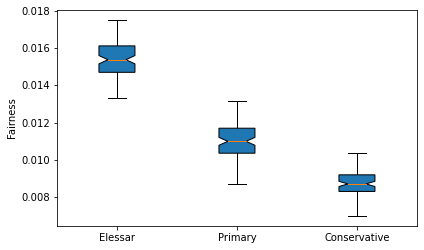

In [26]:
fig = plt.figure(figsize =(5, 3))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
#data = [elessar_float_cum_diff, primary_float_cum_diff, conservative_float_cum_diff]
data = [elessar_fair, primary_fair, conservative_fair]
# Creating plot
bp = ax.boxplot(data, notch=True, patch_artist=True)
ax.set_xticklabels(['Elessar', 'Primary','Conservative'])
ax.set_ylabel("Fairness")
# show plot
plt.show()

In [56]:
with open("utility_distribution.txt") as textFile:
    distribution = [line.split(", ") for line in textFile]

In [57]:
distri_np = np.array(distribution)

In [58]:
distri_np[0][0], distri_np[0][-1]

('[3.5', '3.0]\n')

In [59]:
distri_np[0][0] = distri_np[0][0][1:]
distri_np[0][-1] = distri_np[0][-1][:-2]

In [60]:
distri_np[0][0], distri_np[0][-1]

('3.5', '3.0')

In [61]:
distri_float = distri_np.astype(np.float)

In [62]:
distri_float.shape

(1, 10000)

In [63]:
distri_float[0][0]

3.5

In [64]:
distri_float = distri_float.reshape(10000)

In [65]:
distri_float[0]

3.5

(array([2.600e+01, 1.260e+02, 7.400e+01, 2.270e+02, 2.060e+02, 1.096e+03,
        8.740e+02, 1.869e+03, 1.181e+03, 2.007e+03, 1.223e+03, 3.730e+02,
        4.430e+02, 1.060e+02, 1.230e+02, 1.900e+01, 1.500e+01, 5.000e+00,
        6.000e+00, 1.000e+00]),
 array([-3.5  , -2.725, -1.95 , -1.175, -0.4  ,  0.375,  1.15 ,  1.925,
         2.7  ,  3.475,  4.25 ,  5.025,  5.8  ,  6.575,  7.35 ,  8.125,
         8.9  ,  9.675, 10.45 , 11.225, 12.   ]),
 <BarContainer object of 20 artists>)

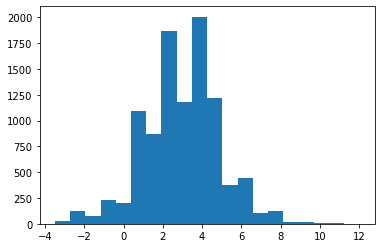

In [66]:
plt.hist(distri_float, bins=20)

In [67]:
distri_float[0:30]

array([ 3.5, -2. ,  2. ,  5.5,  5. ,  5. ,  2.5,  1.5,  6. ,  3.5,  1. ,
        1.5,  4.5,  0.5,  3.5,  5.5,  4. ,  5. ,  4. ,  1. ,  2.5,  2. ,
        4.5,  3. ,  2.5,  3.5,  3. ,  3. ,  1.5,  7.5])